# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 10 - Mini-Projeto - Agrupando Clientes Por Consumo de Energia</font>

### Especificação

A partir de dados de consumo de energia de clientes, nosso trabalho é agrupar os consumidores por similaridade a afim de compreender o comportamento dos clientes e sua relação com o consumo de energia.

Você deve executar as seguintes tarefas:
    
1- Tratar os valores ausentes nos dados.

2- Coletar uma amostra de 1% dos dados para criar o modelo de clusterização com o K-Means.

3- Encontrar o melhor valor de K para esse conjunto de dados.

4- Criar o modelo K-Means usando o valor de K encontrado no item 3.

5- Criar um Meshgrid para visualização de todos os clusters.

6- Visualizar os centróides.

7- Calcular o Silhoutte Score.

8 - Calcular a média de consumo de energia por cluster (usar a coluna Global_active_power para o cálculo da média).

Dica: Para o item 8, considere a amostra criada no item 2.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [2]:
# Carregando os dados
dataset = pd.read_csv('dados/household_power_consumption.txt', delimiter = ';', low_memory = False)

In [3]:
dataset.head(-5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075249,26/11/2010,20:53:00,0.944,0.000,238.720,4.000,0.000,0.000,0.0
2075250,26/11/2010,20:54:00,0.946,0.000,239.310,4.000,0.000,0.000,0.0
2075251,26/11/2010,20:55:00,0.946,0.000,239.740,4.000,0.000,0.000,0.0
2075252,26/11/2010,20:56:00,0.942,0.000,239.410,4.000,0.000,0.000,0.0


In [4]:
# 1- Tratar os valores ausentes nos dados.
dataset.isnull().sum().sort_values(ascending=False)[:10]
df_v1 = dataset.dropna(axis=0)
df_v1.info()
df_v1.isnull().sum().sort_values(ascending=False)[:10]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 156.3+ MB


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [5]:
# 2- Coletar uma amostra de 1% dos dados para criar o modelo de clusterização com o K-Means.
df_v2 = df_v1.sample(frac=0.01,replace=True)
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20493 entries, 571762 to 1058823
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   20493 non-null  object 
 1   Time                   20493 non-null  object 
 2   Global_active_power    20493 non-null  object 
 3   Global_reactive_power  20493 non-null  object 
 4   Voltage                20493 non-null  object 
 5   Global_intensity       20493 non-null  object 
 6   Sub_metering_1         20493 non-null  object 
 7   Sub_metering_2         20493 non-null  object 
 8   Sub_metering_3         20493 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.6+ MB


In [6]:
# Removendo as colunas Date, Time
df_v2.head()
df_v3 = df_v2.drop(columns=['Date','Time'])
df_v3

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
571762,1.840,0.212,237.040,7.800,0.000,0.000,0.0
475262,0.940,0.000,239.180,4.000,0.000,0.000,0.0
489193,2.216,0.000,239.200,9.200,0.000,0.000,18.0
1166954,0.384,0.058,246.020,1.600,0.000,0.000,0.0
668189,1.032,0.166,240.890,4.400,0.000,0.000,0.0
...,...,...,...,...,...,...,...
562434,0.554,0.118,237.720,2.400,0.000,0.000,0.0
45766,1.998,0.162,239.880,8.400,0.000,4.000,18.0
1514147,0.368,0.114,241.490,1.600,0.000,0.000,1.0
1207018,0.492,0.000,246.020,2.000,0.000,0.000,0.0


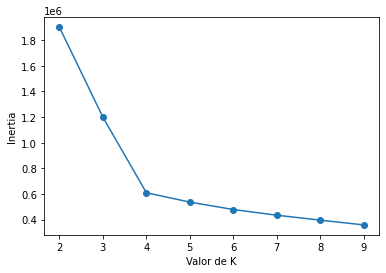

In [7]:
# 3- Encontrar o melhor valor de K para esse conjunto de dados.

# Lista de valores de K
Ks = range(2, 10)

# Lista para as métricas
valores_metrica = []

# Loop por diferentes modelos com diferentes valores de K
for K in Ks:
    modelo = KMeans(n_clusters = K)
    modelo.fit(df_v3)
    valores_metrica.append(modelo.inertia_)

plt.plot(Ks, valores_metrica, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()

In [8]:
# Reduzindo a dimensionalidade
pca = PCA(n_components = 2).fit(df_v3)
pca_2d = pca.transform(df_v3)
pca_2d

array([[-4.22247859,  2.52167177],
       [-6.06119682,  1.20574717],
       [11.666     , -4.72264969],
       ...,
       [-6.48061017, -0.13542129],
       [-7.76789104, -0.06718876],
       [10.55272615, -4.5325193 ]])

In [9]:
# 4- Criar o modelo K-Means usando o valor de K encontrado no item 3.
modelo_v1 =KMeans(n_clusters=4)
modelo_v1.fit(pca_2d)

KMeans(n_clusters=4)

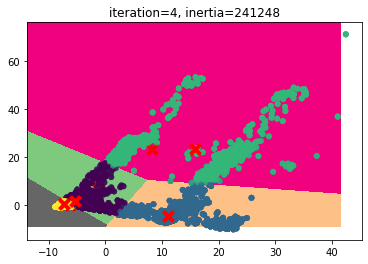

In [10]:
# 5- Criar um Meshgrid para visualização de todos os clusters.

for n_iter in range(1, 5):

    # Cria o classificador e constrói o modelo com os dados de entrada definidos nas células anteriores
    modelo = KMeans(n_clusters = 4, max_iter = n_iter, n_init = 1, init = 'random', random_state = 101)
    modelo.fit(pca_2d)
    
    # Plot
    x_min, x_max = pca_2d[:, 0].min() - 5, pca_2d[:, 0].max() - 1
    y_min, y_max = pca_2d[:, 1].min() + 1, pca_2d[:, 1].max() + 5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.imshow(Z, 
               interpolation = 'nearest', 
               cmap = plt.cm.Accent,
               extent = (xx.min(), xx.max(), yy.min(), yy.max()),
               aspect = 'auto', 
               origin = 'lower')

    # Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.
    # Iteration = Número de iterações definido pelo parâmero n_iter definido acima
    plt.scatter(pca_2d[:,0], pca_2d[:,1], c = modelo.labels_, edgecolors = 'none', alpha = 0.7)
    plt.scatter(modelo.cluster_centers_[:,0],  modelo.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)
    plt.title("iteration=%s, inertia=%s" %(n_iter, int(modelo.inertia_)))

plt.show()

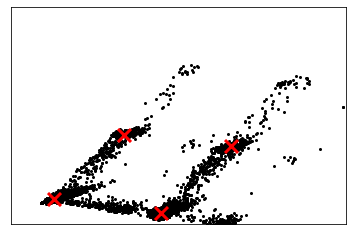

In [11]:
# 6- Visualizar os centróides.
plt.plot(pca_2d[:, 0], pca_2d[:, 1], 'k.', markersize = 4)
centroids = modelo_v1.cluster_centers_
inert = modelo_v1.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
# 7- Calcular o Silhoutte Score.

score = silhouette_score(pca_2d, modelo_v1.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.861


In [13]:
# 8 - Calcular a média de consumo de energia por cluster (usar a coluna Global_active_power para o cálculo da média).
cluster_map = pd.DataFrame(df_v3)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo_v1.labels_
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    0.529938
1    1.799038
2    2.999954
3    4.234398
Name: Global_active_power, dtype: float64

### Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>